In [236]:
# import base packages into the namespace for this program

import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
np.set_printoptions(precision=3)
pd.options.display.float_format = '{:.3f}'.format
sns.set()
from sklearn import metrics
import scipy.stats as st 
import numpy as np
import pandas as pd
# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
import os


In [13]:
#Change working directory
import os
os.getcwd()
# os.chdir('../data')
# os.getcwd()

'C:\\Users\\enisbe\\Google Drive New\\NW\\MSDS 422\\Assignments_Working\\Week4'

In [14]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('../../data/boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())


boston DataFrame (first and last five rows):
  neighborhood  crim     zn  indus  chas   nox  rooms    age   dis  rad  tax  \
0       Nahant 0.006 18.000  2.310     0 0.538  6.575 65.200 4.090    1  296   
1   Swampscott 0.027  0.000  7.070     0 0.469  6.421 78.900 4.967    2  242   
2   Swanpscott 0.027  0.000  7.070     0 0.469  7.185 61.100 4.967    2  242   
3   Marblehead 0.032  0.000  2.180     0 0.458  6.998 45.800 6.062    3  222   
4   Marblehead 0.069  0.000  2.180     0 0.458  7.147 54.200 6.062    3  222   

   ptratio  lstat     mv  
0   15.300  4.980 24.000  
1   17.800  9.140 21.600  
2   17.800  4.030 34.700  
3   18.700  2.940 33.400  
4   18.700  5.330 36.200  
    neighborhood  crim    zn  indus  chas   nox  rooms    age   dis  rad  tax  \
501     Winthrop 0.063 0.000 11.930     0 0.573  6.593 69.100 2.479    1  273   
502     Winthrop 0.045 0.000 11.930     0 0.573  6.120 76.700 2.288    1  273   
503     Winthrop 0.061 0.000 11.930     0 0.573  6.976 91.000 2.167 

In [15]:
print('\n----General description of the boston_input DataFrame:-----\n')
print(boston_input.info())


----General description of the boston_input DataFrame:-----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 53.4+ KB
None


In [24]:

# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
# boston['mvr'] = boston['mv']/boston['rooms']

print('\nGeneral description of the boston DataFrame:')
print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
boston.describe()



General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.4 KB
None

Descriptive statistics of the boston DataFrame:


,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,12.653,22.529
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,7.141,9.182
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,37.970,50.000


In [25]:
#instead of using pairplot which get crowded I used individual scatter plots.

def plot_scatter(df,y):
    f, axes = plt.subplots(5,3, figsize=(15,15), sharex=False, squeeze=False, gridspec_kw={"hspace":0.5, "wspace":0.3})
 
    from math import floor
    for i,var  in enumerate(df.columns.tolist()):

  
        ax =  axes[floor(i/3),i%3]
        ax.set_title("Scatter " + str(var).upper() + ' by ' + y.upper())
        p = sns.scatterplot(x=var, y=y, data=df, ax=ax)
  
    

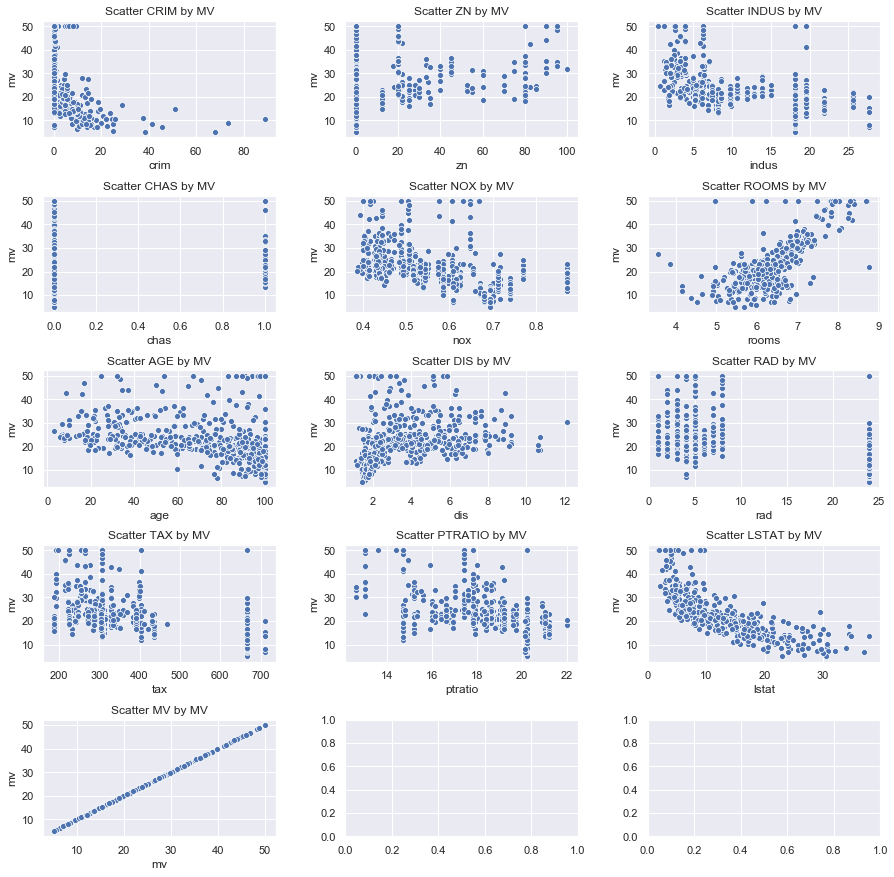

In [26]:
#Before Transformation and plot
plot_scatter(df=boston, y='mv')

In [27]:
#BoxCox Transformation and plot
boston2 = boston.transform(lambda x: st.boxcox(x+0.01)[0])

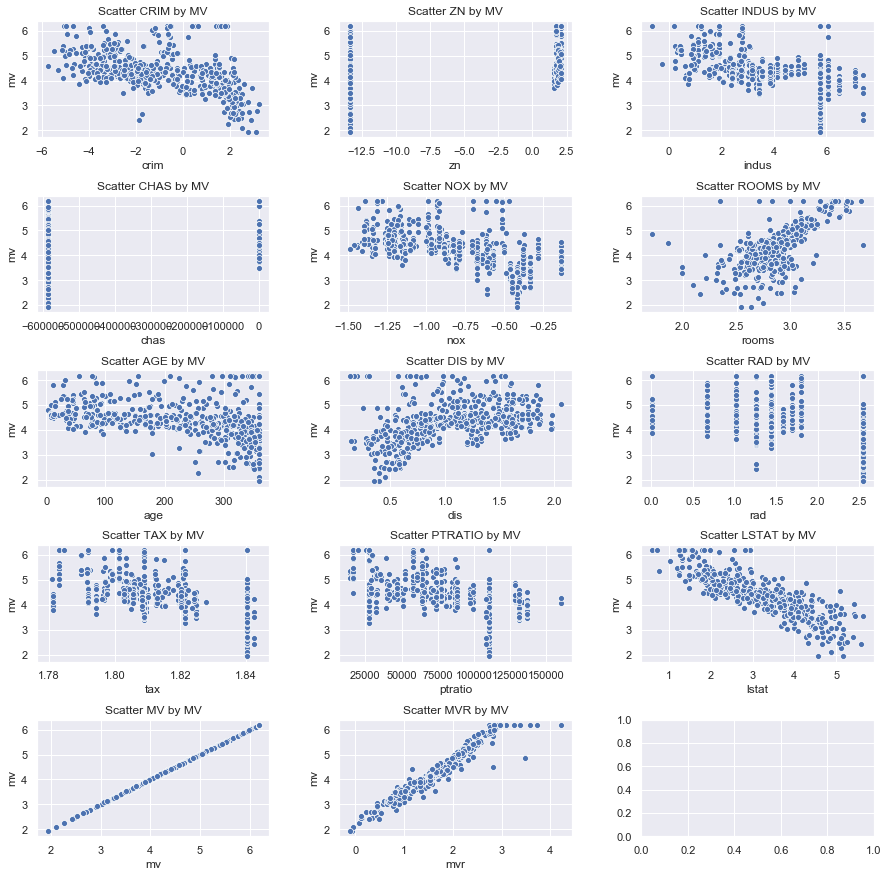

In [20]:
plot_scatter(df=boston2, y='mv')

In [21]:
#describe boxcoxdata data
boston2.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv,mvr
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,-1.091,-9.335,3.886,-547075.169,-0.825,2.849,225.269,1.067,1.598,1.817,81612.158,3.212,4.341,1.682
std,2.222,6.735,1.874,149279.492,0.341,0.254,112.467,0.444,0.661,0.017,34507.205,1.017,0.786,0.605
min,-5.753,-13.373,-0.644,-587728.314,-1.489,1.716,2.379,0.129,0.010,1.781,14187.601,0.590,1.932,-0.114
25%,-2.885,-13.373,2.403,-587728.314,-1.151,2.709,122.541,0.704,1.259,1.804,57756.310,2.438,3.927,1.371
50%,-1.467,-13.373,3.860,-587728.314,-0.810,2.829,254.702,1.067,1.438,1.812,85658.783,3.244,4.344,1.708
75%,1.182,1.586,5.770,-587728.314,-0.570,2.977,330.554,1.450,2.550,1.840,110531.879,3.972,4.671,1.984
max,3.237,2.095,7.405,0.010,-0.135,3.677,358.844,2.061,2.550,1.842,160234.675,5.653,6.183,4.222


#  Scale data using MinMax

In [29]:
from sklearn.preprocessing import MinMaxScaler


col_names = [ 'crim', 'zn', 'indus','chas','nox','rooms', 'age','dis','rad','tax','ptratio','lstat', 'mv']
prelim_model_data = np.array([\
    boston2.crim,\
    boston2.zn,\
    boston2.indus,\
    boston2.chas,\
    boston2.nox,\
    boston2.rooms,\
    boston2.age,\
    boston2.dis,\
    boston2.rad,\
    boston2.tax,\
    boston2.ptratio,\
    boston2.lstat,
 
    boston2.mv]).T


scaler = MinMaxScaler()

model_data = scaler.fit_transform(prelim_model_data)
boston3 =  pd.DataFrame(model_data) 
boston3.columns = col_names
 

 

# Histograms and statistics of Scaled Data and not scaled data

In [30]:
boston3.describe( )

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,0.519,0.261,0.563,0.069,0.490,0.578,0.625,0.485,0.625,0.581,0.462,0.518,0.567
std,0.247,0.435,0.233,0.254,0.252,0.129,0.316,0.230,0.260,0.281,0.236,0.201,0.185
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.319,0.000,0.379,0.000,0.249,0.507,0.337,0.298,0.492,0.376,0.298,0.365,0.469
50%,0.477,0.000,0.560,0.000,0.501,0.567,0.708,0.485,0.562,0.512,0.489,0.524,0.567
75%,0.771,0.967,0.797,0.000,0.679,0.643,0.921,0.684,1.000,0.966,0.660,0.668,0.644
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


-----------------Non-Scaled Data----------------------------


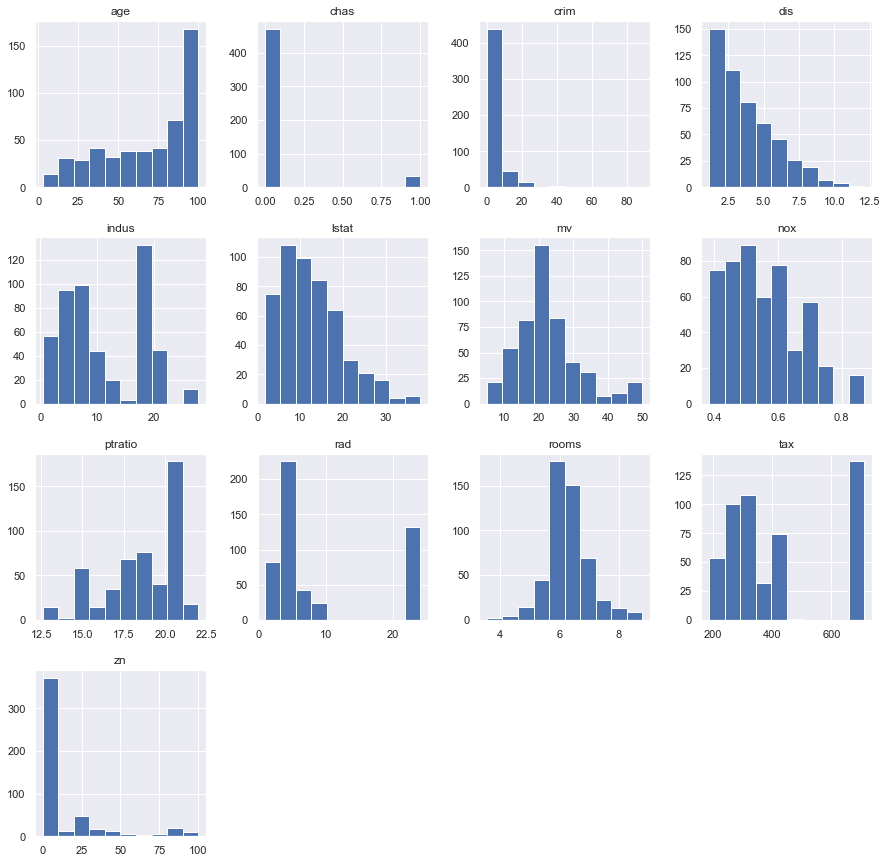

In [31]:
print("-----------------Non-Scaled Data----------------------------")
boston.hist( figsize=(15,15));

-----------------Scaled Data----------------------------


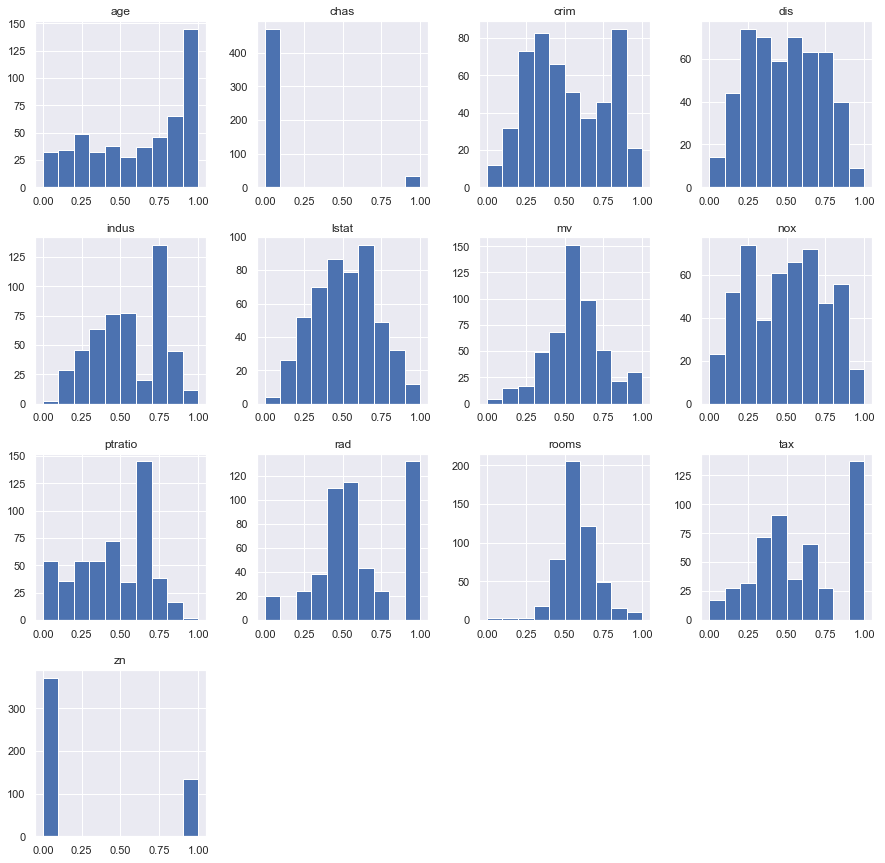

In [33]:
#scaled data
print("-----------------Scaled Data----------------------------")
boston3.hist( figsize=(15,15));

# Correlations

<Figure size 432x288 with 0 Axes>

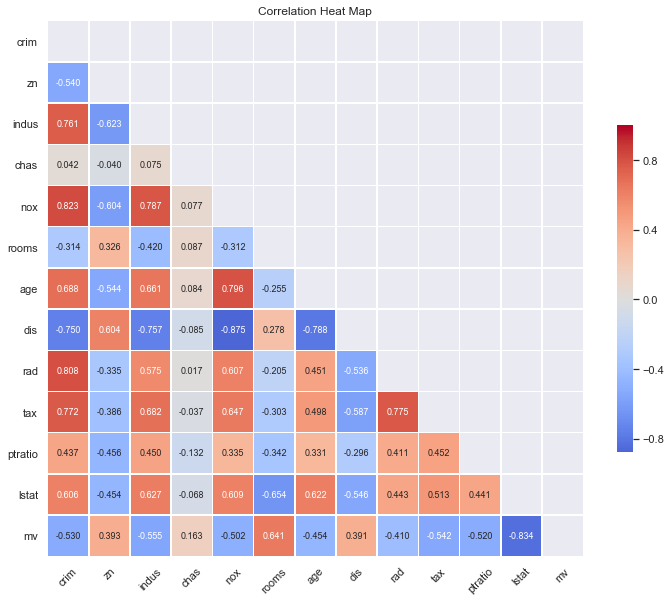

In [34]:
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')             
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')  
    
    
corr_chart(boston3)

### Pairplot graphs

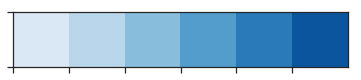

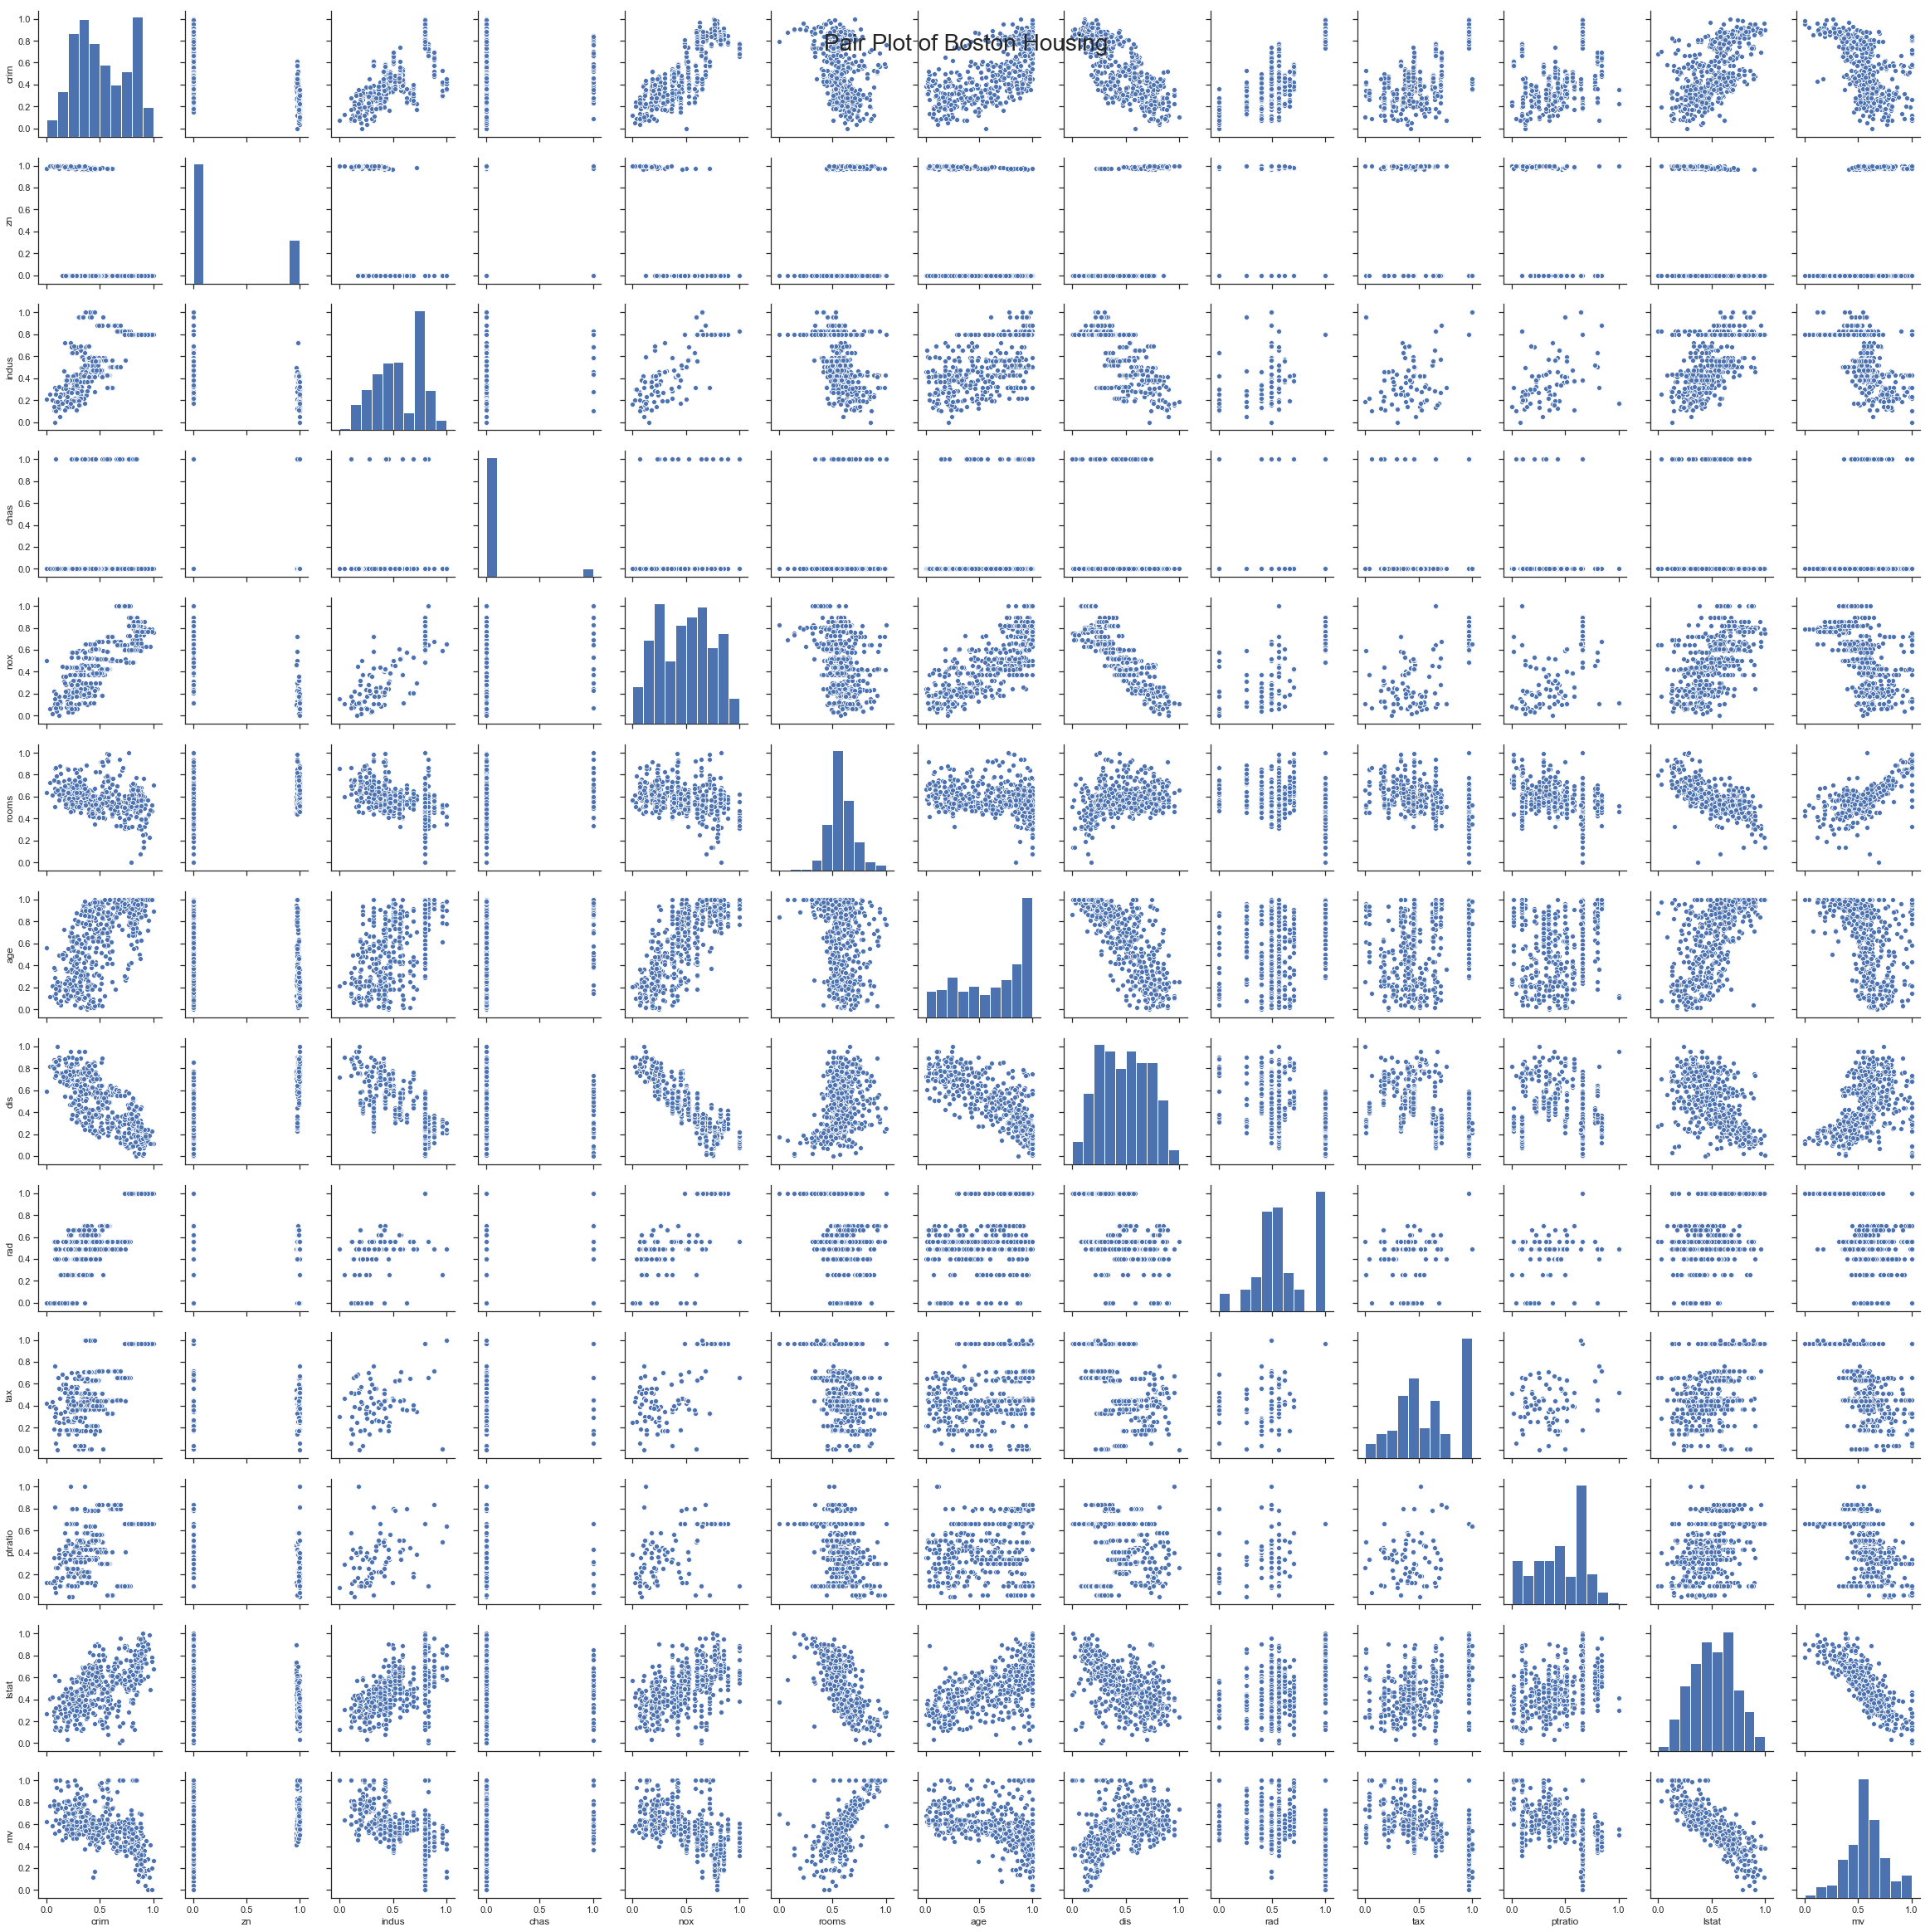

In [269]:
sns.set(style="ticks")
sns.palplot(sns.color_palette("Blues"))
#Scatterplot Matrix
def sp_plot(scatp_df):
    sns.pairplot(scatp_df)
    # Title 
    file_title = 'pp_Boston_Housing'
    plt.suptitle('Pair Plot of Boston Housing', size = 28);
    plt.savefig('pp_BSH_Options.pdf', 
                    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                    orientation='landscape', papertype=None, format=None, 
                    #transparent=True, pad_inches=.25, frameon=None
                    transparent=True, pad_inches=.25)
sp_plot(boston3)

# Evaluation of Regressors

### 1. Optimize hyper parametar

In [42]:
# Ignore warnings
import warnings
import plotly
import plotly.graph_objs as go
warnings.filterwarnings("ignore", category=Warning)

# split data for the hyper parametars 
df = boston3.copy()

train_df, valid_df = train_test_split(df, test_size = 0.3, random_state = 0)

X = train_df.drop(['mv'], axis = 1)
y = train_df['mv']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
X_valid = valid_df.drop(['mv'], axis = 1)
y_valid = valid_df['mv']

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,  BaggingClassifier, RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV, cross_validate, cross_val_score, cross_val_predict

#S11 Compare Classifer perromance with and wo regularzation
mdls = ['Linear Regression', 'Ridge ', 'Lasso', 'Elastic Net','Random Forecast Regressor']
clfs = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), RandomForestRegressor()]
mdl_param ={mdls[0]: {'fit_intercept':[True,False]},
            mdls[1]: {'alpha':[ 0.01, 0.1, 1, 10, 100, 500, 1000], 'solver':['cholesky']},
            mdls[2]: {'alpha':[ 0.1,1,10, 100, 500, 1000]},
            mdls[3]: {'alpha':[ 0.1,1,10, 100, 500, 1000],'copy_X':[True], 'fit_intercept':[True], 'l1_ratio':[0.5],
                      'max_iter':[1000], 'normalize':[False], 'positive':[False], 'precompute':[False],'random_state':[0],
                      'selection':['cyclic'], 'tol':[0.0001], 'warm_start':[False]},
            mdls[4]: {'n_estimators': [20, 50, 100], 'criterion': ['mse'],'max_features': ['auto','sqrt'], 'n_jobs':[-1],
                      'max_depth':[4], 'min_samples_leaf':[5,10,20], 'min_samples_split':[5,10,20] }}

test_scores = []

for name, estimator in zip(mdls,clfs):
    print("-"*5 + name+ "-"*5)
    clf = GridSearchCV(estimator, mdl_param[name], scoring='neg_mean_squared_error', return_train_score=True, cv=10)
    clf.fit(X_train, y_train)

    print("best params: " + str(clf.best_params_))
    print("best scores: " + str(clf.best_score_))
    
    rmse = np.sqrt(mean_squared_error(y_train, clf.predict(X_train)))
    rmse_tst = np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))
    rmse_vld = np.sqrt(mean_squared_error(y_valid, clf.predict(X_valid)))
    
    print("rmse: {:}".format(rmse))
    print("rmse_tst: {:}".format(rmse_tst))
    print("rmse_vld: {:}".format(rmse_vld))
    
    
    if name in ('Linear Regression', 'Ridge ', 'Lasso', 'Elastic Net'): 
            appnd_arg=((name, rmse, clf.error_score, clf.best_score_ , y_valid, clf.predict(X_valid),  clf.best_estimator_.coef_ ,
                      clf.best_estimator_.intercept_, clf.best_estimator_, clf.best_params_, None))
    else: 
            appnd_arg=((name, rmse, clf.error_score, clf.best_score_ , y_valid, clf.predict(X_valid),  None, None, 
                        clf.best_estimator_, clf.best_params_, clf.best_estimator_.feature_importances_))

    test_scores.append((appnd_arg))
    
df_rslt = pd.DataFrame()
df_rslt = df_rslt.append(pd.DataFrame(test_scores, columns=['nm','rmse', 'errscr', 'bscr','y_vld', 'x_prd','coef', 
                                                           'intr','best','bparm','fi']),ignore_index=True)

-----Linear Regression-----
best params: {'fit_intercept': True}
best scores: -0.14633249461982578
rmse: 0.3670289489458169
rmse_tst: 0.392294896998697
rmse_vld: 15.598441990323593
-----Ridge -----
best params: {'alpha': 0.01, 'solver': 'cholesky'}
best scores: -0.14697419144221474
rmse: 0.36764269582838355
rmse_tst: 0.3936622378035781
rmse_vld: 12.84067575893357
-----Lasso-----
best params: {'alpha': 0.1}
best scores: -0.17687842149063127
rmse: 0.4136379042735778
rmse_tst: 0.4206030061217731
rmse_vld: 5.7033602624154565
-----Elastic Net-----
best params: {'l1_ratio': 0.5, 'max_iter': 1000, 'selection': 'cyclic', 'copy_X': True, 'alpha': 0.1, 'precompute': False, 'tol': 0.0001, 'normalize': False, 'random_state': 0, 'warm_start': False, 'positive': False, 'fit_intercept': True}
best scores: -0.1681186503028737
rmse: 0.4016976482640377
rmse_tst: 0.4181451741635354
rmse_vld: 5.668475897379731
-----Random Forecast Regressor-----
best params: {'n_jobs': -1, 'criterion': 'mse', 'min_samples

### Understand the estimators and they impact OOB errors

In [261]:
#S8 Understand optimal Number of trees using OOB Error Rate

from collections import OrderedDict
ensemble_clfs = [("rfr",RandomForestRegressor(n_jobs=-1, max_depth=4, criterion='mse',
                                              max_features='auto', oob_score=True, random_state=RANDOM_SEED))]

error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
# Range of trees
min_estimators = 1
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train , y_train )

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Plot Error rate
data = []
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    trace = go.Scatter(x=xs, y=ys,name=label,mode='lines')
    data.append(trace)
    layout = go.Layout(xaxis=dict(title='Number Trees'),yaxis=dict(title='OOB Error Rate'),hovermode='closest')
fig = go.Figure(data=data, layout=layout)

plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig)

# Kfold cross validation


In [262]:
#code for KFold validation
from sklearn.model_selection import KFold

def kFold_validation(models):
    df = boston3.copy()
    
 
    kf = KFold(n_splits=5,shuffle=True, random_state=RANDOM_SEED)
    results = {} 
    cnt = 1

    for train, test in kf.split(df):
 
        train_data = df.loc[train]
        test_data = df.loc[test]

        y_train = train_data.mv 
        X_train = train_data.drop(['mv'],axis=1)
        y_test = test_data.mv 
        X_test = test_data.drop(['mv'],axis=1)

  
        for i, model in enumerate(models):
            reg = models[model]
            reg_fit = reg.fit(X_train,y_train)
            y_test_pred = reg_fit.predict(X_test)
            msre = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))   
 
            results[model,cnt] = msre
        cnt +=1
        
        
    reg = [w[0]for w in results.keys() ]
    iteration = [w[1]for w in results.keys()]
    value = [w for w in results.values()]
    results = pd.DataFrame([reg,iteration,value]).T
    results.columns = ['regression', 'fold', 'MSRE']
    results['MSRE'] = results.MSRE.astype(float)
    return results.groupby('regression')['MSRE'].mean().transform(pd.Series.sort_values,ascending=True).reset_index()

#using the optimized alpha used the 10 time KFold validation 
RANDOM_SEED = 12
models = {
"linear_reg": LinearRegression(fit_intercept=True,normalize=False ) ,
"ridge_reg" : Ridge(alpha=0.1,fit_intercept=True,normalize=False, random_state=RANDOM_SEED) ,
"lasso_reg" : Lasso(alpha=0.001,fit_intercept=True,normalize=False, random_state=RANDOM_SEED) ,
"elastic_net_reg": ElasticNet(alpha=0.001,l1_ratio=0.5,fit_intercept=True,normalize=False, random_state=RANDOM_SEED),
"random_forest_reg": RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=5, criterion='mse',
                            max_features='log2', oob_score=True, random_state=RANDOM_SEED)
    }


kFold_validation(models)

,regression,MSRE
0,random_forest_reg,0.072
1,ridge_reg,0.090
2,linear_reg,0.090
3,elastic_net_reg,0.091
4,lasso_reg,0.092


# 1. The regression using scaled and box cox transformed data. 

----------PLOT of Prediction vs Actuals for : linear_reg ----------
Training R^2 score: 0.7865
Test R^2 score: 0.7336
Mean target: 0.5668
MSRE test data: 0.0923
MSRE/mean(MV): 0.1583


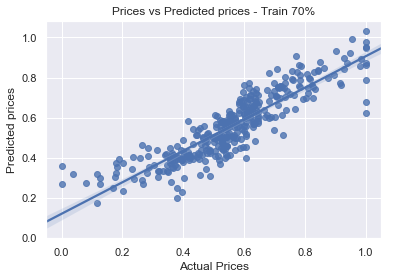

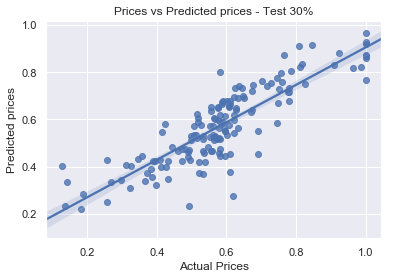

----------PLOT of Prediction vs Actuals for : ridge_reg ----------
Training R^2 score: 0.7864
Test R^2 score: 0.7354
Mean target: 0.5668
MSRE test data: 0.0920
MSRE/mean(MV): 0.1578


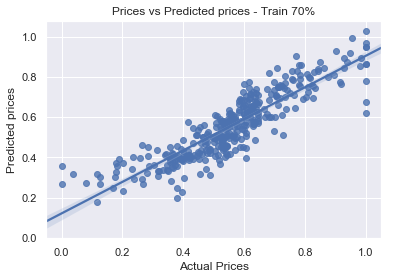

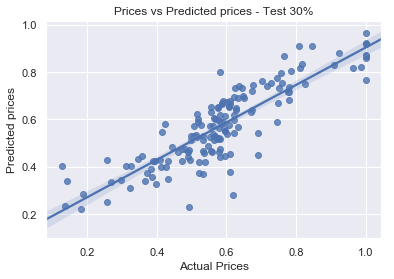

----------PLOT of Prediction vs Actuals for : lasso_reg ----------
Training R^2 score: 0.7713
Test R^2 score: 0.7297
Mean target: 0.5668
MSRE test data: 0.0929
MSRE/mean(MV): 0.1595


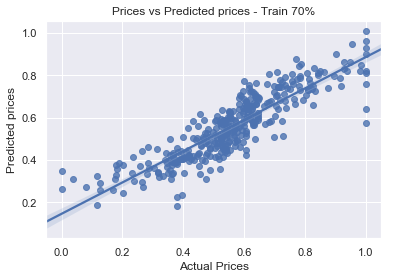

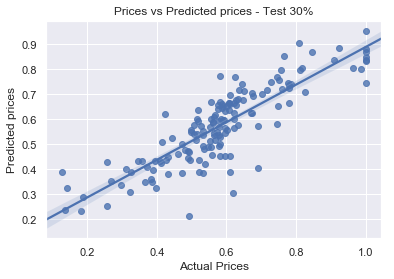

----------PLOT of Prediction vs Actuals for : elastic_net_reg ----------
Training R^2 score: 0.7812
Test R^2 score: 0.7401
Mean target: 0.5668
MSRE test data: 0.0911
MSRE/mean(MV): 0.1564


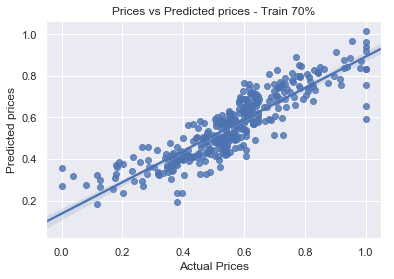

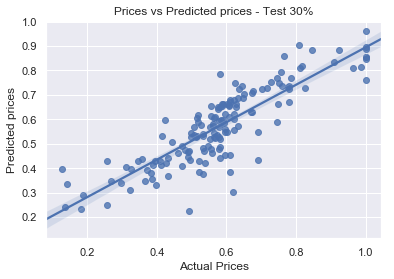

----------PLOT of Prediction vs Actuals for : random_forest_reg ----------
Training R^2 score: 0.9249
Test R^2 score: 0.8569
Mean target: 0.5668
MSRE test data: 0.0676
MSRE/mean(MV): 0.1161


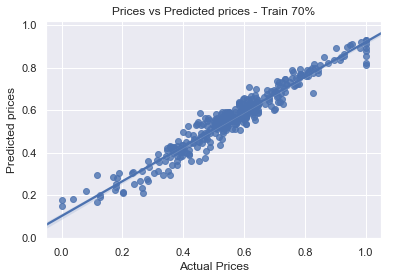

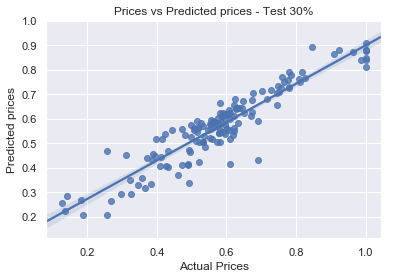

In [263]:
from sklearn.model_selection import train_test_split

# Use copy to prevent overwriting original scaled data

df = boston3.copy()
X = df.drop(['mv' ], axis = 1)
y = df['mv']
metrics_={}
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = RANDOM_SEED)
for model in models: 
    reg = models[model]
    reg.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    print("----------PLOT of Prediction vs Actuals for :", model, "----------")
    print("Training R^2 score: {:.4f}".format(reg.score(X_train, y_train)))
    print("Test R^2 score: {:.4f}".format(reg.score(X_test, y_test)))
    print("Mean target: {:.4f}".format(np.mean(y)))
    print("MSRE test data: {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)) ))
    print("MSRE/mean(MV): {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)) /np.mean(y_test)))

#  np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))  
    
    metrics_[model] = {"R_2_train": reg.score(X_train, y_train),
               "R_2_test":  reg.score(X_test, y_test),
               "RMSE_train": np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),
               "RMSE_test":  np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
              }
    
        
    f, ax = plt.subplots()
    sns.regplot(y_train, y_train_pred)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted prices")
    plt.title("Prices vs Predicted prices - Train 70%")

    f, ax = plt.subplots()
    sns.regplot(y_test, y_test_pred)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted prices")
    plt.title("Prices vs Predicted prices - Test 30%")
    plt.show()

In [264]:
pd.DataFrame(metrics_)

,elastic_net_reg,lasso_reg,linear_reg,random_forest_reg,ridge_reg
RMSE_test,0.091,0.093,0.092,0.068,0.092
RMSE_train,0.087,0.089,0.086,0.051,0.086
R_2_test,0.740,0.730,0.734,0.857,0.735
R_2_train,0.781,0.771,0.786,0.925,0.786


# Comparing scaled and non-scaled data

In [247]:
dfs = {"scaled": boston3.copy(),"not_scaled": boston.copy()}
# reg = models["random_forecast_reg"]

models_short = {'random_forecast_reg': models["random_forecast_reg"], "linear_reg": models['linear_reg']}
metrics2_= {}
for model in models_short:
    reg = models_short[model]
    for df_name in dfs:
        df = dfs[df_name]

        X = df.drop(['mv'], axis = 1)
        y = df['mv']

        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = RANDOM_SEED)


        reg.fit(X_train, y_train)
        y_train_pred = reg.predict(X_train)
        y_test_pred = reg.predict(X_test)
#         print("----------PLOT of Prediction vs Actuals for :", df_name, "----------")
#         print("Training R^2 score: {:.4f}".format(reg.score(X_train, y_train)))
#         print("Test R^2 score: {:.4f}".format(reg.score(X_test, y_test)))
#         print("Mean target: {:.4f}".format(np.mean(y)))

#         print("MSRE test data: {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)) ))
#         print("MSRE/mean(MV): {:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)) /np.mean(y_test)))

    #  np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))  
        metrics2_[model,df_name] = {"R_2_train": reg.score(X_train, y_train),
                   "R_2_test":  reg.score(X_test, y_test),
                   "RMSE_train": np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),
                   "RMSE_test":  np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
                  }
#         f, ax = plt.subplots()
#         sns.regplot(y_train, y_train_pred)
#         plt.xlabel("Actual Prices")
#         plt.ylabel("Predicted prices")
#         plt.title("Prices vs Predicted prices - Train 70%")

#         f, ax = plt.subplots()
#         sns.regplot(y_test, y_test_pred)
#         plt.xlabel("Actual Prices")
#         plt.ylabel("Predicted prices")
#         plt.title("Prices vs Predicted prices - Test 30%")
#         plt.show()
pd.DataFrame(metrics2_)

linear_reg        random_forecast_reg       
           not_scaled scaled          not_scaled scaled
RMSE_test       4.972  0.092               3.440  0.068
RMSE_train      4.614  0.086               2.478  0.051
R_2_test        0.715  0.734               0.863  0.857
R_2_train       0.743  0.786               0.926  0.925

## Feature imporatance using Lasso and Random Forest

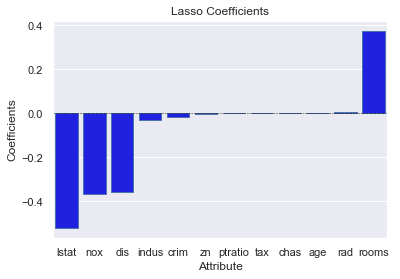

In [250]:
df = boston2.copy()
X = df.drop(['mv'], axis = 1)
y = df['mv']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = RANDOM_SEED)

lasso_reg = Lasso(alpha=0.001,fit_intercept=True,normalize=False, random_state=RANDOM_SEED)
lasso_reg.fit(X, y)
coeffcients = pd.DataFrame([X.columns,lasso_reg.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients = coeffcients.sort_values(['Coefficients'])
sns.barplot(x="Attribute",y="Coefficients",color='blue',edgecolor='b',data=coeffcients)
plt.axhline(y=0, ls='--', color='black',lw=0.5)
plt.title("Lasso Coefficients");

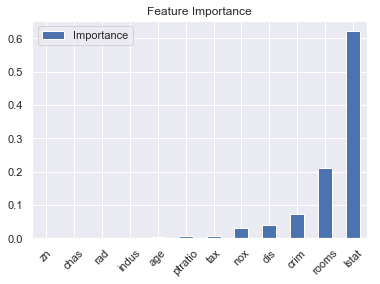

In [183]:
rfr = RandomForestRegressor(n_jobs=-1, max_depth=4, criterion='mse',
                                              max_features='auto', oob_score=True, random_state =RANDOM_SEED)
 

df = boston2.copy() 
X = df.drop(['mv' ], axis = 1)
y = df['mv']
X_lbl = X.columns
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = RANDOM_SEED)


rfr.fit(X,y)

#S9 Plot variable importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_lbl, rfr.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
fi=importances.sort_values(by='Importance').plot(kind='bar', rot=45,
                                              title='Feature Importance',
                                              style='R')
fig = fi.get_figure()
fig.savefig("fi.png", bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
            orientation='landscape', papertype=None, format=None, 
            transparent=True, pad_inches=.25, frameon=None)


# Export Tree

In [268]:
#S9 Plot RF Model
from graphviz import Source
from IPython.display import display_html, display, HTML, SVG
# display(HTML("<style>.container{width:100% !important}"))
from sklearn.tree import export_graphviz
os.environ["PATH"] += os.pathsep + r'C:\Python35\graphviz\release\bin'

rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1, max_depth=4, criterion='mse',
                            max_features='log2', oob_score=True, random_state=1)

df = boston.copy() 
X = df.drop(['mv' ], axis = 1)
y = df['mv']
X_lbl = X.columns
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = RANDOM_SEED)

rfr= rfr.fit(X_train, y_train)
 
 
    
# Extract single tree
estimator = rfr.estimators_[19]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='rfr.dot', feature_names = X_lbl,
                rounded = True, proportion = False, precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'rfr.dot', '-o', 'rfr.png', '-Gdpi=600'])

0

### Recomandation: 

* Use Random Forest regressor
